In [1]:
from sunpy.io import read_file
from sunpy.map import Map
from sunpy.net import helioviewer
from sunpy.net import Fido
from sunpy.net import attrs as a
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import lofarSun
import os
#lofarSun.__version__

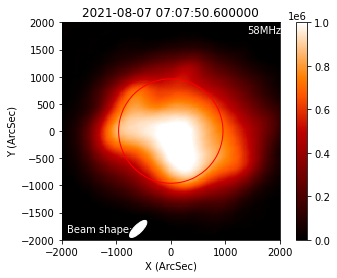

In [200]:
filelofar = 'fitsavg/avgSB189-t0001-image.fits'

#filelofar = 'fits_20min/30-04-2021/SB243-t0004-image.fits'

lofardata=lofarSun.IMdata()
lofardata.load_fits(filelofar)
[fig,ax]=lofardata.plot_image(fov=2000,vmax_set=1e6) #130e8 2e8
plt.show()

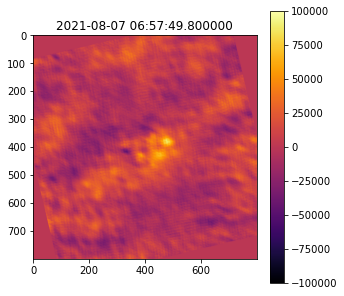

In [199]:

lofimg1=lofarSun.IMdata()
lofimg2=lofarSun.IMdata()

if True:
    
    lofimg1.load_fits('fitsavg/avgSB189-t'+str(0).rjust(4,'0')+'-image.fits')
    lofimg2.load_fits('fitsavg/avgSB189-t'+str(1).rjust(4,'0')+'-image.fits')
    fig = plt.figure(figsize=[5,5])
    ax = fig.add_subplot()
    im=ax.imshow(lofimg1.data_xy_calib-lofimg2.data_xy_calib)
    im.set_clim([-1e5,1e5])
    ax.set_title(lofimg1.t_obs)
    fig.colorbar(im)
    #fig.savefig('png_turb/'+str(idx).rjust(4,'0')+'.jpg')
    

In [58]:
sunmap=lofardata.make_map()

(<matplotlib.patches.Circle at 0x7f85c7f4ed30>, None)

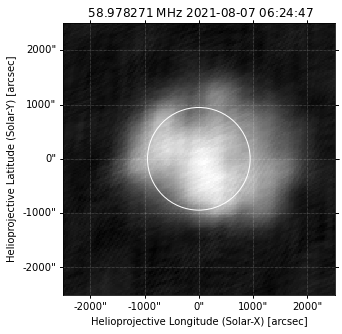

In [70]:
fig = plt.figure(figsize=[5,5])
ax1 = fig.add_subplot(projection=sunmap)

sunmap.plot(axes=ax1)
sunmap.draw_limb()

In [117]:
%%capture

lofimg=lofarSun.IMdata()
for idx in range(0,48):
    lofimg.load_fits('fitsavg/SB189-t'+str(idx).rjust(4,'0')+'-image.fits')
    [fig,ax]=lofimg.plot_image(fov=2000,vmax_set=11e5) #130e8 2e8
    
    fig.savefig('png/'+str(idx).rjust(4,'0')+'.jpg')
    plt.close('all')

In [118]:
os.system('ffmpeg -framerate 8 -pattern_type glob -i "png/*.jpg" CH202108.mp4 -y')

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/data/scratch/zhang/peijin_py37/conda_install/envs/lofarsun --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  l

0

In [119]:

from IPython.display import Video
Video("CH202108.mp4")

In [ ]:
lofimg.load_fits(filelofar)
lofimg.load_fits('fitsavg/SB189-t'+str(idx).rjust(4,'0')+'-image.fits')

In [157]:
%%capture

lofimg1=lofarSun.IMdata()
lofimg2=lofarSun.IMdata()

for idx in range(0,48):
    
    lofimg1.load_fits('fitsavg/SB189-t'+str(idx).rjust(4,'0')+'-image.fits')
    lofimg2.load_fits('fitsavg/SB189-t'+str(idx+1).rjust(4,'0')+'-image.fits')
    fig = plt.figure(figsize=[5,5])
    ax = fig.add_subplot()
    im=ax.imshow(lofimg1.data_xy_calib-lofimg2.data_xy_calib)
    im.set_clim([-1e5,1e5])
    ax.set_title(lofimg1.t_obs)
    fig.colorbar(im)
    fig.savefig('png_turb/'+str(idx).rjust(4,'0')+'.jpg')
    plt.close('all')

In [158]:
os.system('ffmpeg -framerate 8 -pattern_type glob -i "png_turb/*.jpg" CH202108_turb.mp4 -y')

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/data/scratch/zhang/peijin_py37/conda_install/envs/lofarsun --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1609680890771/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  l

0

In [159]:

Video("CH202108_turb.mp4")

In [ ]:

class LofarDataCleaned:
    def __init__(self):
        self.havedata = False

    def load_fits(self,fname):
        if len(fname)>0:
            self.havedata = True
            self.fname = fname
            hdulist = fits.open(fname)
            hdu = hdulist[0]
            self.header = hdu.header
            self.t_obs = sunpy.time.parse_time(self.header['DATE-OBS']).datetime
            self.freq = hdu.header['CRVAL3']/1e6
            data=np.zeros((hdu.header[3],hdu.header[4]), dtype=int)
            data = hdu.data
            self.data=data[0,0,:,:]
            [RA_sun,DEC_sun] = self.get_cur_solar_centroid(t_obs=self.t_obs)
            [RA_obs,DEC_obs] = self.get_obs_image_centroid(self.header)
            [RA_ax ,DEC_ax ] = self.get_axis_obs(self.header)

            [self.xx,self.yy] = self.RA_DEC_shift_xy0(RA_ax,DEC_ax,RA_obs,DEC_obs)
            self.data_xy = self.sun_coord_trasform(self.data,self.header,act_r=True,act_s=False)
            [b_maj,b_min,b_ang] = self.get_beam()
            self.beamArea = (b_maj/180*np.pi)*(b_min/180*np.pi)*np.pi /(4*np.log(2))
            self.data_xy_calib = self.data_xy*(300/self.freq)**2/2/(1.38e-23)/1e26/self.beamArea
            
            
    

    
    def get_cur_solar_centroid(self,t_obs):
            # use the observation time to get the solar center
        [RA,DEC] = sun_position(t=t_obs, equinox_of_date=False)
        return [RA.degree%360,DEC.degree%360]

    def get_obs_image_centroid(self,header):
        # get the RA DEC center of the image from the solar center
        RA_obs = header['CRVAL1']
        DEC_obs = header['CRVAL2']
        return [RA_obs%360,DEC_obs%360]

    def get_axis_obs(self,header):
        # make the header with the image
        # refer to https://www.atnf.csiro.au/computing/software/miriad/progguide/node33.html
        if self.havedata:
            [RA_c,DEC_c] = self.get_obs_image_centroid(self.header)
            RA_ax_obs   = RA_c + ((np.arange(header['NAXIS1'])+1) 
                                -header['CRPIX1'])*header['CDELT1']/np.cos(header['CRVAL2'])
            DEC_ax_obs  = DEC_c+ ((np.arange(header['NAXIS2'])+1) 
                                -header['CRPIX2'])*header['CDELT2']
            return [RA_ax_obs,DEC_ax_obs]
        else:
            print("No data loaded")
            
    def RA_DEC_shift_xy0(self,RA,DEC,RA_cent,DEC_cent):
        # transformation between the observed coordinate and the solar x-y coordinate
        # including the x-y shift
        x_geo = -(RA  -  RA_cent)*np.cos(DEC_cent)*3600
        y_geo = -(DEC_cent - DEC)*3600
        # (in arcsec)
        # the rotation angle of the sun accoording to the date
        return [x_geo,y_geo]

    def sun_coord_trasform(self,data,header,act_r=True,act_s=True):
        # act_r : rotation operation
        # act_s : shift operation
        if self.havedata:
            [RA_sun,DEC_sun] = self.get_cur_solar_centroid(self.t_obs);
            [RA_obs,DEC_obs] = self.get_obs_image_centroid(header);
            x_shift_pix = (RA_sun  - RA_obs) /header['CDELT1']
            y_shift_pix = (DEC_sun - DEC_obs)/header['CDELT2']
            if act_s==False:
                x_shift_pix = 0
                y_shift_pix = 0
            rotate_angel = sun_coord.P(self.t_obs).degree
            if act_r==False:
                rotate_angel = 0
            data_tmp = scipy.ndimage.shift(data,(-x_shift_pix,-y_shift_pix))
            data_new = scipy.ndimage.rotate(data_tmp,rotate_angel,reshape=False)
            return data_new
        else:
            print("No data loaded")
                        

    #def make_lofar_sun_map(fname):
# TODO : to make a map data structure which will be compatible with SUNPY
    #     return 0
        
    def get_beam(self):
        if self.havedata:
            solar_PA = sun_coord.P(self.t_obs).degree
            b_maj =  self.header['BMAJ']
            b_min  = self.header['BMIN']
            b_ang = self.header['BPA']+solar_PA # should consider the beam for the data
            return [b_maj,b_min,b_ang]
        else:
            print("No data loaded")
            

    def plot_image(self,vmax_set=np.nan,log_scale=False,fov=3000,pol=False):
        if self.havedata:
            t_cur_datetime = self.t_obs
            solar_PA = sun_coord.P(self.t_obs).degree
            freq_cur = self.freq
            [b_maj,b_min,b_angel] = self.get_beam()
            b_maj = b_maj*3600
            b_min = b_min*3600
            data_new = self.data_xy_calib
            xx = self.xx
            yy = self.yy

           
            #print(b_major,b_min,b_angel+solar_PA)
            fig=plt.figure()#num=None, figsize=(8, 6),dpi=120)
            ax = plt.gca()
            cmap_now = 'CMRmap_r'
            cmap_now = 'gist_ncar_r'
            cmap_now = 'gist_heat'
            vmin_now = 0
            if log_scale:
                data_new = 10*np.log10(data_new)
            if vmax_set>0:
                vmax_now = vmax_set
            else:
                vmax_now = 1.2*np.nanmax(data_new)
                
            if pol:
                vmin_now = -vmax_now
                cmap_now ='bwr'
                
            ax.text(1400,1800, str(int(freq_cur)) + 'MHz',color='w')
            circle1 = plt.Circle((0,0), 960, color='r',fill=False)
            beam0 = Ellipse((-500, -1800), b_maj, b_min, -b_angel ,color='w')
            print(b_angel)
            ax.text(-600,-1800,'Beam shape:',horizontalalignment='right',verticalalignment='center' ,color='w')
            ax.add_artist(circle1)
            ax.add_artist(beam0)
            plt.xlabel('X (ArcSec)')
            plt.ylabel('Y (ArcSec)')
            
            plt.imshow(data_new,vmin=vmin_now, vmax=vmax_now , 
                            interpolation='nearest',cmap=cmap_now, origin='lower',
                            extent=(min(xx),max(xx),min(yy),max(yy)))
            cbar = plt.colorbar()
            
            cbar.set_label('Brightness temperature (K)', rotation=270,labelpad=10)
            plt.xlim([-fov,fov])
            plt.ylim([-fov,fov])
            plt.title(str(t_cur_datetime))

            plt.show()
            return [fig,ax]
        else:
            print("No data loaded")
            

In [2]:
lofimg = LofarDataCleaned()
lofimg.load_fits('fits_v1/SB192-t0000-image.fits')
[fig,ax] = lofimg.plot_image(fov=4800,vmax_set=-4e9)

NameError: name 'LofarDataCleaned' is not defined

-6.388205778769148


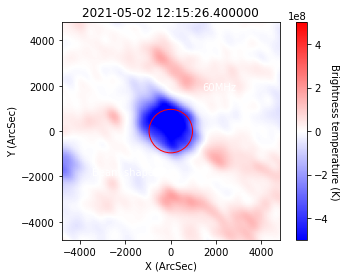

In [4]:
lofimg = LofarDataCleaned()
lofimg.load_fits('fits_long/SB192V-image.fits')
[fig,ax] = lofimg.plot_image(fov=4800,pol=True,vmax_set=5e8)

In [1]:
lofimg = LofarDataCleaned()
lofimg.load_fits('fits_60min/01/SB194-t0000-dirty.fits')
[fig,ax] = lofimg.plot_image(fov=7800,vmax_set=-1e9)

NameError: name 'LofarDataCleaned' is not defined

In [ ]:
%%capture

for idx in range(0,240):
    
    lofimg = LofarDataCleaned()
    lofimg.load_fits('fits_v0/SB192-t'+str(idx).rjust(4,'0')+'-image.fits')
    [fig,ax] = lofimg.plot_image(fov=5000,vmax_set=15e9)
    
    fig.savefig('png/'+str(idx).rjust(4,'0')+'.jpg')
    plt.close('all')

In [85]:
#ffmpeg -framerate 5 -pattern_type glob -i 'png/*.png' -c:v libx264 out.mp4
#convert -delay 6 -quality 95 png*.png out.mp4
#ffmpeg -framerate 20 -pattern_type glob -i 'png/*.jpg' out.mp4

In [86]:
import os
os.system('ffmpeg -framerate 15 -pattern_type glob -i "png/*.jpg" out_shortbase192.mp4 -y')

0

In [35]:
Video("out_shortbase192.mp4")

38.08841431594425


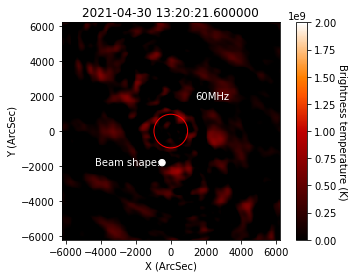

In [16]:
lofimg = LofarDataCleaned()
lofimg.load_fits('fits_80min/30-04-2021/SB194-t0001-residual.fits') # 243 192 194 103
#lofimg.load_fits('fits_20min/04-05-2021/SB194-t0007-image.fits') # 243 192 194 103
[fig,ax] = lofimg.plot_image(fov=6200,vmax_set=2e9)

#fig.savefig('CHdisk.pdf')

In [26]:
%%capture

SB = 'SB243'

# SB192 for 02-05

drawstrs=[#'29-04-2021/'+SB,'30-04-2021/'+SB,'01-05-2021/'+SB,'04-05-2021/'+SB,
#'02-05-2021/'+SB,
#'03-05-2021/'+SB,
'30-04-2021/'+SB]

for drawstr in drawstrs:
    for idx in range(0,12):

        lofimg = LofarDataCleaned()
        lofimg.load_fits('fits_20min/'+drawstr+'-t'+str(idx).rjust(4,'0')+'-image.fits')
 #       [fig,ax] = lofimg.plot_image(fov=5000,vmax_set=8e7)
 #       [fig,ax] = lofimg.plot_image(fov=2600,vmax_set=-7e9) # for disk
        [fig,ax] = lofimg.plot_image(fov=2400,vmax_set=2e8)
        fig.savefig('source0430/'+drawstr+'_t'+str(idx).rjust(3,'0')+'.jpg')
        plt.close('all')

132.21131632362545


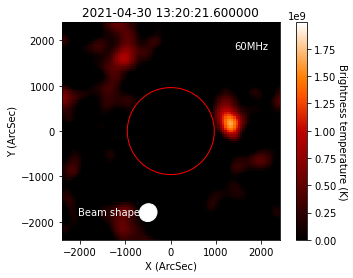

[<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'2021-04-30 13:20:21.600000'}, xlabel='X (ArcSec)', ylabel='Y (ArcSec)'>]

In [19]:
lofimg1 = LofarDataCleaned()
lofimg1.load_fits('fits_20min/30-04-2021/SB194-t0004-image.fits') # 243 192 194 103

lofimg2 = LofarDataCleaned()
lofimg2.load_fits('fits_20min/30-04-2021/SB194-t0005-image.fits') # 243 192 194 103

#plt.imshow(lofimg2.data_xy_calib-lofimg1.data_xy_calib)

lofdiff = LofarDataCleaned()
lofdiff.load_fits('fits_20min/30-04-2021/SB194-t0004-image.fits') # 243 192 194 103
lofdiff.data_xy_calib=lofimg2.data_xy_calib-lofimg1.data_xy_calib
lofdiff.plot_image(fov=2400,vmax_set=-7e9)

In [ ]:
# ToDo 
# 1 V integral imaging
# 2 overlapping lasco to LOFAR
# 3 FOV 